# K Means Implementation

### Iris dataset

*sepal* = Kelchblatt<br>
*petal* = Blütenblatt

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
feature_names = iris.feature_names
classes = iris.target
class_names = iris.target_names
data_description = iris.DESCR #for more information about the dataset
example_flower = dict(zip(feature_names, features[0]))

In [4]:
example_flower

{'sepal length (cm)': 5.1,
 'sepal width (cm)': 3.5,
 'petal length (cm)': 1.4,
 'petal width (cm)': 0.2}

In [5]:
features.shape

(150, 4)

In [6]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Sklearn approach

In [8]:
from sklearn.cluster import KMeans

In [9]:
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = cluster.fit(features)
labels = model.labels_

## Implementation with numpy

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#### helper functions

In [16]:
def calculate_cluster_mean(centroids, k_cluster):
    for cluster in k_cluster:
        centroids[cluster] = np.mean(k_cluster[cluster], axis=0)
    return centroids, k_cluster

def calculate_distance(data, centroids, k_cluster):
    for feature in data:
        distances = [get_distance(feature, centroids[centroid]) for centroid in centroids]
        cluster = distances.index(min(distances))
        k_cluster[cluster].append(feature)
    return k_cluster


def check_optimization(centroids, prev_centroids, tolerance):
    optimized = True
    
    for centroid in centroids:
        prev_centroid = prev_centroids[centroid]
        current_centroid = centroids[centroid]
        
        if np.sum((current_centroid-prev_centroid)/prev_centroid*100.0) > tolerance:
            print(np.sum((current_centroid-prev_centroid)/prev_centroid*100.0))
            optimized = False
            
    return optimized


def get_distance(x, y, metric="euclidean"):
    if metric == "euclidean":
        return np.sqrt(np.sum(np.power(x-y, 2)))
    else:
        print("Metric '{metric}' is unknown.")
        return None

def init_cluster(k):
    k_cluster = {}
    for i in range(k):
        k_cluster[i] = []
    return k_cluster

def init_centroids(data, k, random=False):
    centroids = {}
    if random:
        random_data = data[np.random.choice(np.arange(len(data)), k), :]
        for i in range(k):
            centroids[i] = random_data[i]
    else:
        centroids[i] = features[i]
    return centroids

#### main function

In [20]:
def kmeans(data, k, metric ="euclidean", max_iterations = 500, tolerance = 0.0001):
    
    iteration = 0
    # initalize (random) centroids
    centroids = init_centroids(data, k, random=True)

    while True:
        
        # initialize cluster
        k_cluster = init_cluster(k)
        
        # update k_cluster
        k_cluster = calculate_distance(data, centroids, k_cluster)
        
        prev_centroids = dict(centroids)
        
        # calculate mean of cluster
        centroids, k_cluster = calculate_cluster_mean(centroids, k_cluster)
        
        
        optimized = check_optimization(centroids, prev_centroids, tolerance)
    
        iteration += 1
        if iteration%100 == 0:
            print(f"Iteration: {iteration}/{max_iterations}")
            
            
        if iteration >= max_iterations or optimized:
            break
        
    return k

In [21]:
kmeans(features, 3, max_iterations=100)

12.809069790201807
116.91294875438099
31.42468035915868
1.0381154048719732
90.59131283356679
9.00477584755364
56.0574649683105
9.295909944375218
23.09739640608557
5.268726831619555
6.261854526311759
1.9396194546545806
4.519677805835917
2.864692104500099
5.251779799775158
3.68701300030245
5.785260546539344
3.0546792863260506
4.298494618481762
3.333051824214075
4.03710974879181
2.666264305377924
2.689218176151795
3.7131306225365273
1.8394282892145153
0.4617153882508516
1.4177894959074588


3

In [31]:
class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [32]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

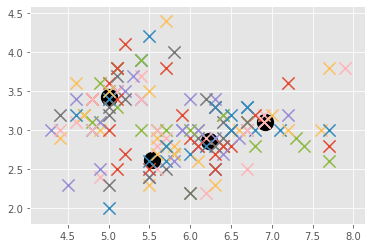

In [33]:
clf = K_Means()
clf.fit(features)
#clf.predict()

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    #color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", s=150, linewidths=5)
        
plt.show()

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

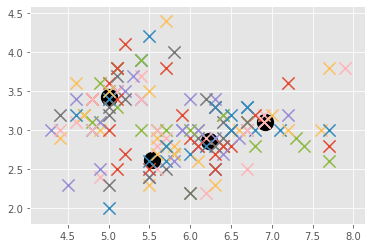

In [36]:
clf = K_Means()
clf.fit(features)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", s=150, linewidths=5)
        


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()